# 서울시 아파트 실거래가를 이용한 서울시 아파트 유형분석  - 201884052 이지혁
### 프로젝트2까지 실거래가를 예측하는 프로젝트를 진행하려 하였으나 프로젝트3에서는 k-prototypes 클러스터링으로 2020년 서울시 아파트 실거래가 데이터로 군집을 하는 프로젝트를 진행
### 서울시 아파트 실거래가를 사용하였음
- 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기

In [2]:
#2020년 데이터 분석
filename='C:/Users/LEE_JI_HYEOK_V2/Documents/data/DAML/서울특별시_부동산_실거래가_정보_2020년.csv'
df2020=pd.read_csv(filename, encoding='euc-kr', low_memory=False)
df2020.head()

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11290-2020-4-0000066-1,1129013800101440024,11290,성북구,1129013800,장위동,2020,4,신고,1,0.0,59.92,2,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,11290-2020-4-0000628-1,1129013400105080016,11290,성북구,1129013400,길음동,2020,4,신고,1,0.0,84.77,2,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,11530-2020-4-0014284-1,1153010200107400029,11530,구로구,1153010200,구로동,2020,4,신고,1,NaN,36.90,0,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,11170-2020-4-0005040-1,1117011500101930000,11170,용산구,1117011500,산천동,2020,4,신고,1,NaN,59.55,0,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,11170-2020-4-0001553-1,1117012900101930003,11170,용산구,1117012900,이촌동,2020,4,신고,1,NaN,64.43,0,5.0,2001,아파트,735000000,1971.0,강변


In [3]:
df2020.shape

(176001, 19)

In [4]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   실거래가아이디  176001 non-null  object 
 1   지번코드     176001 non-null  object 
 2   시군구코드    176001 non-null  int64  
 3   자치구명     176001 non-null  object 
 4   법정동코드    176001 non-null  int64  
 5   법정동명     176001 non-null  object 
 6   신고년도     176001 non-null  int64  
 7   업무구분코드   176001 non-null  int64  
 8   업무구분     176001 non-null  object 
 9   물건번호     176001 non-null  int64  
 10  대지권면적    89147 non-null   float64
 11  건물면적     176001 non-null  float64
 12  관리구분코드   176001 non-null  object 
 13  층정보      163838 non-null  float64
 14  건물주용도코드  176001 non-null  int64  
 15  건물주용도    176001 non-null  object 
 16  물건금액     176001 non-null  int64  
 17  건축년도     175436 non-null  float64
 18  건물명      163838 non-null  object 
dtypes: float64(4), int64(7), object(8)
memory usage: 25.5+ MB


In [5]:
df2020.columns

Index(['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드',
       '업무구분', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도코드', '건물주용도',
       '물건금액', '건축년도', '건물명'],
      dtype='object')

In [161]:
df2020['건물주용도'].unique()

array(['아파트', '연립주택', '오피스텔', '단독주택'], dtype=object)

# 데이터 전처리
- 아파트만 알아보기 위해 필터링
- 결측치가 0으로 표기되어있어 0이상으로 필터링
- 사용할 컬럼명만 남김

In [3]:
df=df2020.loc[df2020['건물주용도']=='아파트',:]
df=df[df['건축년도']>0]
df=df[df['층정보']>0]
df=df[df['건물면적']>0]
df=df[df['물건금액']>0]
df=df[['자치구명', '법정동명','건물면적','층정보','건축년도','물건금액','건물명']]
df.head()

,자치구명,법정동명,건물면적,층정보,건축년도,물건금액,건물명
2,구로구,구로동,36.90,1.0,1994.0,105000000,궁전아트빌라
3,용산구,산천동,59.55,2.0,2001.0,830000000,리버힐삼성
4,용산구,이촌동,64.43,5.0,1971.0,735000000,강변
5,용산구,이태원동,105.75,9.0,1982.0,1430000000,청화1
7,용산구,후암동,150.08,4.0,2002.0,875000000,힐튼빌리지2차


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87372 entries, 2 to 175994
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구명    87372 non-null  object 
 1   법정동명    87372 non-null  object 
 2   건물면적    87372 non-null  float64
 3   층정보     87372 non-null  float64
 4   건축년도    87372 non-null  float64
 5   물건금액    87372 non-null  int64  
 6   건물명     87372 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.3+ MB


# 파생변수 생성
- 평수, 금액(단위:억), 평당금액(단위:천만), 건물년식, 동네명

In [4]:
#평수
df['평수']=round(df['건물면적']/3.305785)

In [5]:
#금액 억대
df['물건금액(단위:억)']=round(df['물건금액']/100000000,1)

- 평수, 건축년도, 물건금액, 층정정보 시각화

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

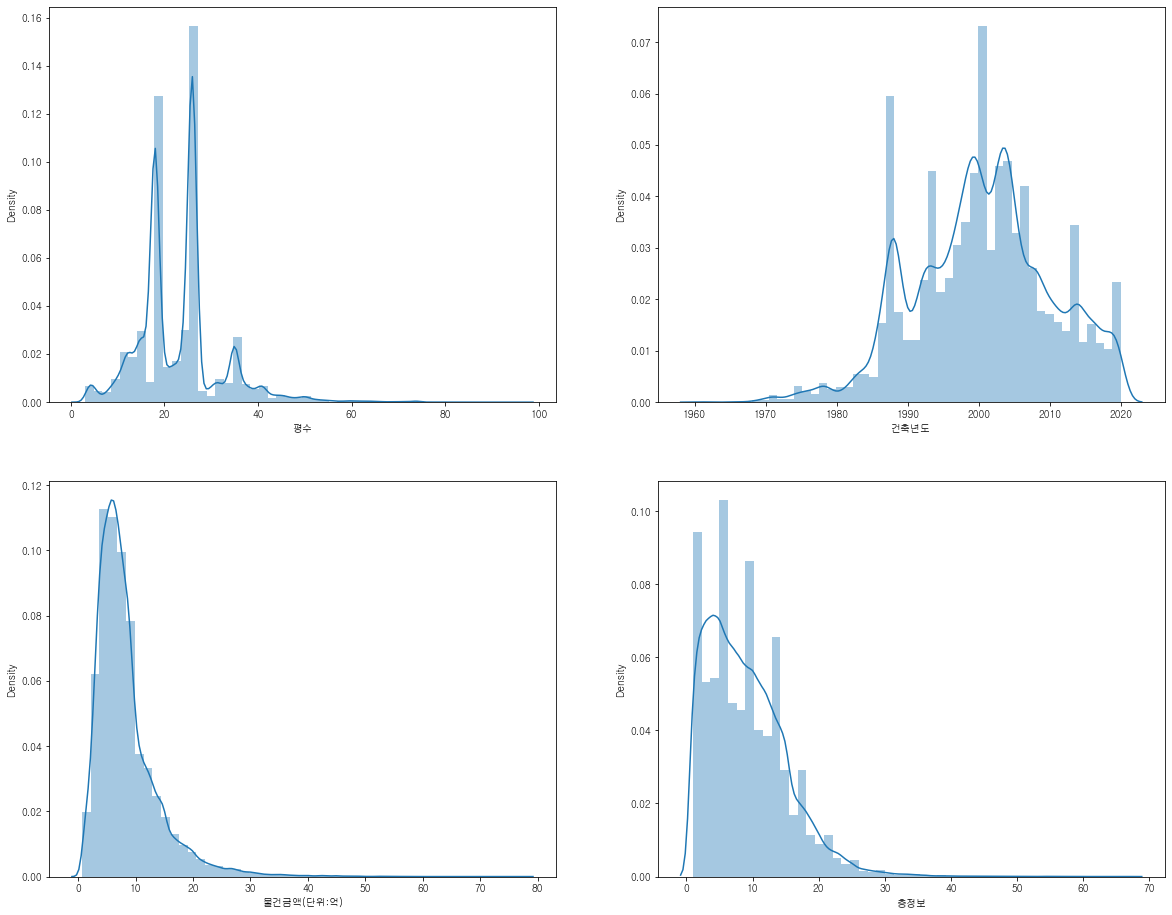

In [11]:
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(20,16))
sns.distplot(df['평수'], ax=ax[0,0])
sns.distplot(df['건축년도'], ax=ax[0,1])
sns.distplot(df['물건금액(단위:억)'], ax=ax[1,0])
sns.distplot(df['층정보'], ax=ax[1,1])
plt.show()

In [7]:
#평당 가격(단위:천만)
df['평당가격(단위:천만)']=round((df['물건금액']/df['평수'])/10000000,3)

In [8]:
#건축년도
import datetime as dt

In [9]:
dt = dt.datetime.now()
dt

datetime.datetime(2021, 12, 8, 8, 39, 45, 946714)

In [10]:
df['건물년식']=dt.year-df['건축년도']

In [11]:
#동네명
df['동네명']=df['자치구명']+' '+df['법정동명']#+' '+df['건물명']

In [12]:
df

,자치구명,법정동명,건물면적,층정보,건축년도,물건금액,건물명,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명
2,구로구,구로동,36.90,1.0,1994.0,105000000,궁전아트빌라,11.0,1.0,0.955,27.0,구로구 구로동
3,용산구,산천동,59.55,2.0,2001.0,830000000,리버힐삼성,18.0,8.3,4.611,20.0,용산구 산천동
4,용산구,이촌동,64.43,5.0,1971.0,735000000,강변,19.0,7.4,3.868,50.0,용산구 이촌동
5,용산구,이태원동,105.75,9.0,1982.0,1430000000,청화1,32.0,14.3,4.469,39.0,용산구 이태원동
7,용산구,후암동,150.08,4.0,2002.0,875000000,힐튼빌리지2차,45.0,8.8,1.944,19.0,용산구 후암동
...,...,...,...,...,...,...,...,...,...,...,...,...
175970,마포구,염리동,58.71,4.0,1997.0,626000000,상록,18.0,6.3,3.478,24.0,마포구 염리동
175977,마포구,공덕동,113.67,4.0,2004.0,1330000000,한화꿈에그린,34.0,13.3,3.912,17.0,마포구 공덕동
175979,마포구,성산동,82.01,2.0,2002.0,560000000,그레이스,25.0,5.6,2.240,19.0,마포구 성산동
175981,마포구,성산동,84.98,6.0,2006.0,600000000,성산동자담이움아파트,26.0,6.0,2.308,15.0,마포구 성산동


In [19]:
df.columns

Index(['자치구명', '법정동명', '건물면적', '층정보', '건축년도', '물건금액', '건물명', '평수',
       '물건금액(단위:억)', '평당가격(단위:천만)', '건물년식', '동네명'],
      dtype='object')

- 데이터분석을 위해서 df을 X로 재생성 

In [13]:
X=df[['층정보', '평수','물건금액(단위:억)', '평당가격(단위:천만)', '건물년식', '동네명','건물명']]
X

,층정보,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명,건물명
2,1.0,11.0,1.0,0.955,27.0,구로구 구로동,궁전아트빌라
3,2.0,18.0,8.3,4.611,20.0,용산구 산천동,리버힐삼성
4,5.0,19.0,7.4,3.868,50.0,용산구 이촌동,강변
5,9.0,32.0,14.3,4.469,39.0,용산구 이태원동,청화1
7,4.0,45.0,8.8,1.944,19.0,용산구 후암동,힐튼빌리지2차
...,...,...,...,...,...,...,...
175970,4.0,18.0,6.3,3.478,24.0,마포구 염리동,상록
175977,4.0,34.0,13.3,3.912,17.0,마포구 공덕동,한화꿈에그린
175979,2.0,25.0,5.6,2.240,19.0,마포구 성산동,그레이스
175981,6.0,26.0,6.0,2.308,15.0,마포구 성산동,성산동자담이움아파트


- 상관관계를 알아봄

In [21]:
#상관관계
corr = X.corr()
corr_list=[]
for i in range(0, len(corr.index)):
    for j in range(0, len(corr.columns)):
        if ((corr.iloc[i,j] > 0.5 or corr.iloc[i,j] < -0.5) and corr.iloc[i,j] != 1):
            corr_list.append(str(corr.index[i] + ' and ' + corr.columns[j] + ' : ' + str(round(corr.iloc[i,j], 2))))
corr_list = '\n'.join(corr_list)
print(corr_list)

평수 and 물건금액(단위:억) : 0.6
물건금액(단위:억) and 평수 : 0.6
물건금액(단위:억) and 평당가격(단위:천만) : 0.74
평당가격(단위:천만) and 물건금액(단위:억) : 0.74


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87372 entries, 2 to 175994
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   층정보          87372 non-null  float64
 1   평수           87372 non-null  float64
 2   물건금액(단위:억)   87372 non-null  float64
 3   평당가격(단위:천만)  87372 non-null  float64
 4   건물년식         87372 non-null  float64
 5   동네명          87372 non-null  object 
 6   건물명          87372 non-null  object 
dtypes: float64(5), object(2)
memory usage: 5.3+ MB


In [14]:
# Get the position of categorical columns
catColumnsPos = [X.columns.get_loc(col) for col in list(X.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(X.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['동네명', '건물명']
Categorical columns position  : [5, 6]


In [15]:
# Convert dataframe to matrix
dfMatrix = X.to_numpy()
dfMatrix

array([[1.0, 11.0, 1.0, ..., 27.0, '구로구 구로동', '궁전아트빌라'],
       [2.0, 18.0, 8.3, ..., 20.0, '용산구 산천동', '리버힐삼성'],
       [5.0, 19.0, 7.4, ..., 50.0, '용산구 이촌동', '강변'],
       ...,
       [2.0, 25.0, 5.6, ..., 19.0, '마포구 성산동', '그레이스'],
       [6.0, 26.0, 6.0, ..., 15.0, '마포구 성산동', '성산동자담이움아파트'],
       [7.0, 30.0, 8.0, ..., 49.0, '마포구 아현동', '혜성']], dtype=object)

In [16]:
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt

In [17]:
from kmodes.kprototypes import KPrototypes

# kprototypes 클러스터링을 위해서 적절한 군집개수를 찾기위해 Elbow method 사용

In [27]:
# Choose optimal K using Elbow method 12시55분? ㄱ 59분 2 2시48분 9 7시끝
cost = []
for cluster in range(1, 20):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


NameError: name 'ggplot' is not defined

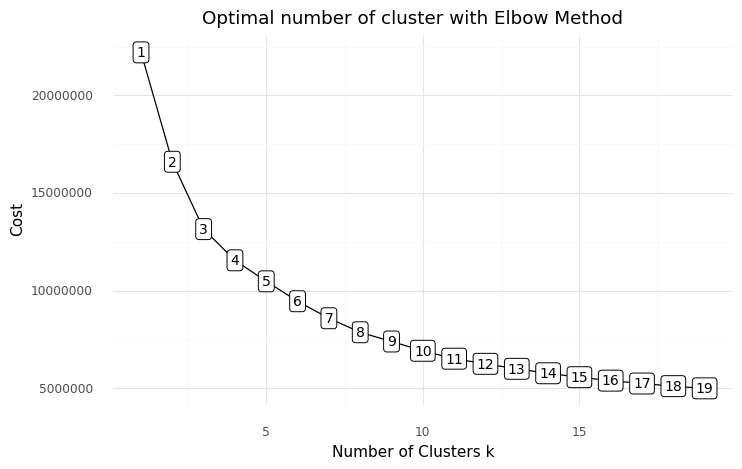

<ggplot: (114012861648)>

In [37]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 20), 'Cost':cost})
# Data viz
p9.options.figure_size = (8, 4.8)
(
    p9.ggplot(data = df_cost)+
    p9.geom_line(p9.aes(x = 'Cluster',
                  y = 'Cost'))+
    p9.geom_point(p9.aes(x = 'Cluster',
                   y = 'Cost'))+
    p9.geom_label(p9.aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    p9.labs(title = 'Optimal number of cluster with Elbow Method')+
    p9.xlab('Number of Clusters k')+
    p9.ylab('Cost')+
    p9.theme_minimal()
)

In [28]:
print(len(cost))

19


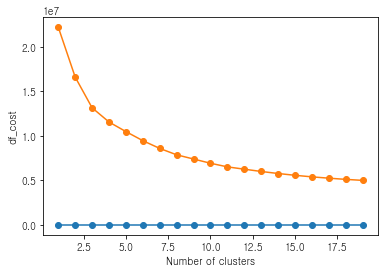

In [38]:
plt.plot(range(1,20),df_cost, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('df_cost')
plt.show()

# 적절한 군집을 주관적으로 판단하여 3개로 진행

In [18]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 2, 2, ..., 1, 1, 2], dtype=uint16)

In [19]:
# Cluster centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['10.727154787967242' '39.331549501337875' '14.3876672342494'
  '3.644661071920835' '20.497932376550718' '서초구 서초동' '삼성래미안']
 ['9.740321890706877' '21.525532028660038' '8.140051866110529'
  '3.817165650732587' '12.7191476847396' '강북구 미아동' '에스케이북한산시티']
 ['7.791523847482397' '19.512900225853592' '6.571226252158777'
  '3.3725598777733032' '28.25874850538063' '노원구 상계동' '한신']]
14
13154045.292556077


# 군집을 One, Two, Three로 구분

In [20]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'One', 1:'Two', 2:'Three'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['One','Two','Three'])

In [21]:
df

,자치구명,법정동명,건물면적,층정보,건축년도,물건금액,건물명,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명,Cluster Labels,Segment
2,구로구,구로동,36.90,1.0,1994.0,105000000,궁전아트빌라,11.0,1.0,0.955,27.0,구로구 구로동,2,Three
3,용산구,산천동,59.55,2.0,2001.0,830000000,리버힐삼성,18.0,8.3,4.611,20.0,용산구 산천동,2,Three
4,용산구,이촌동,64.43,5.0,1971.0,735000000,강변,19.0,7.4,3.868,50.0,용산구 이촌동,2,Three
5,용산구,이태원동,105.75,9.0,1982.0,1430000000,청화1,32.0,14.3,4.469,39.0,용산구 이태원동,2,Three
7,용산구,후암동,150.08,4.0,2002.0,875000000,힐튼빌리지2차,45.0,8.8,1.944,19.0,용산구 후암동,0,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175970,마포구,염리동,58.71,4.0,1997.0,626000000,상록,18.0,6.3,3.478,24.0,마포구 염리동,2,Three
175977,마포구,공덕동,113.67,4.0,2004.0,1330000000,한화꿈에그린,34.0,13.3,3.912,17.0,마포구 공덕동,0,One
175979,마포구,성산동,82.01,2.0,2002.0,560000000,그레이스,25.0,5.6,2.240,19.0,마포구 성산동,1,Two
175981,마포구,성산동,84.98,6.0,2006.0,600000000,성산동자담이움아파트,26.0,6.0,2.308,15.0,마포구 성산동,1,Two


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87372 entries, 2 to 175994
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   자치구명            87372 non-null  object  
 1   법정동명            87372 non-null  object  
 2   건물면적            87372 non-null  float64 
 3   층정보             87372 non-null  float64 
 4   건축년도            87372 non-null  float64 
 5   물건금액            87372 non-null  int64   
 6   건물명             87372 non-null  object  
 7   평수              87372 non-null  float64 
 8   물건금액(단위:억)      87372 non-null  float64 
 9   평당가격(단위:천만)     87372 non-null  float64 
 10  건물년식            87372 non-null  float64 
 11  동네명             87372 non-null  object  
 12  Cluster Labels  87372 non-null  uint16  
 13  Segment         87372 non-null  category
dtypes: category(1), float64(7), int64(1), object(4), uint16(1)
memory usage: 8.9+ MB


In [23]:
# Cluster interpretation
Y=df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
Y=df.groupby('Segment').agg(
    {
        'Total':'count',
        '동네명': lambda x: x.value_counts().index[0],
        '건물명': lambda x: x.value_counts().index[0],
        '층정보': 'mean',
        '평수': 'mean',
        '물건금액(단위:억)': 'mean',
        '평당가격(단위:천만)': 'mean',
        '건물년식': 'mean'
    }
).reset_index()
Y

,Segment,Total,동네명,건물명,층정보,평수,물건금액(단위:억),평당가격(단위:천만),건물년식
0,One,12333,서초구 서초동,삼성래미안,10.727155,39.331550,14.387667,3.644661,20.497932
1,Two,37404,강북구 미아동,에스케이북한산시티,9.740322,21.525532,8.140052,3.817166,12.719148
2,Three,37635,노원구 상계동,한신,7.791524,19.512900,6.571226,3.372560,28.258749


In [24]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [25]:
Y.columns

Index(['Segment', 'Total', '동네명', '건물명', '층정보', '평수', '물건금액(단위:억)',
       '평당가격(단위:천만)', '건물년식'],
      dtype='object')

# 평수, 층정보, 건물년식, 물건금액의 변수들을 5개 범주로 나누었음.
## qcut을 사용하였고, 평수는 qcut이 3개로 나눠지기때문에 수동적으로 나누었음.

In [248]:
#평수
bins = list(range(0, 101, 10)) #구간
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [249]:
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
df["평수level"] = pd.cut(df["평수"], bins, right=False, labels=bins_label[:-1])

In [253]:
df["평수level"].unique()

[0, 2, 3, 1, 4]
Categories (5, int64): [0, 1, 2, 3, 4]

In [251]:
df['평수level'].replace('50이상 60미만','50이상 100미만', inplace = True)
df['평수level'].replace('60이상 70미만','50이상 100미만', inplace = True)
df['평수level'].replace('70이상 80미만','50이상 100미만', inplace = True)
df['평수level'].replace('80이상 90미만','50이상 100미만', inplace = True)
df['평수level'].replace('90이상 100미만','50이상 100미만', inplace = True)
df['평수level'].replace('90이상 100미만','50이상 100미만', inplace = True)
df['평수level'].replace('10이상 20미만','0이상 20미만', inplace = True)
df['평수level'].replace('0이상 10미만','0이상 20미만', inplace = True)

df['평수level']=df['평수level'].replace(['0이상 20미만', '20이상 30미만', '30이상 40미만', '40이상 50미만', '50이상 100미만'],
                     [0,1,2,3,4]).astype('category')
#df['평수level'] = {'0이상 20미만': 0, '20이상 30미만': 1, '30이상 40미만': 2, '40이상 50미만': 3, '50이상 100미만': 4}

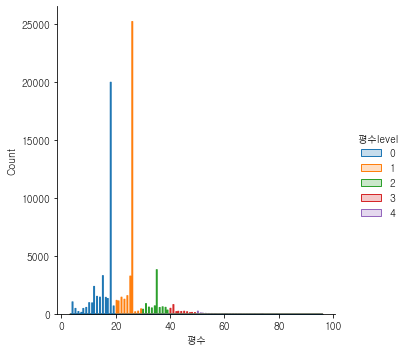

In [252]:
sns.displot(df, x='평수', hue='평수level', element='step')

In [31]:
df['층정보level'] = pd.qcut(df['층정보'], 5, labels=[0, 1, 2,3,4])
df[['층정보', '층정보level']].head()

,층정보,층정보level
2,1.0,0
3,2.0,0
4,5.0,1
5,9.0,2
7,4.0,0


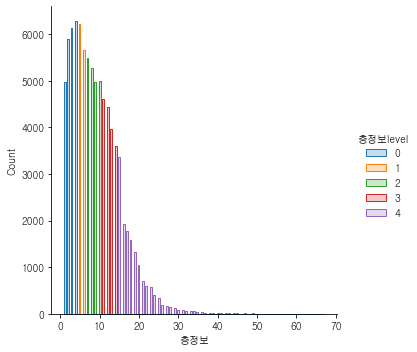

In [32]:
sns.displot(df, x='층정보', hue='층정보level', element='step')

In [33]:
df['건물년식level'] = pd.qcut(df['건물년식'], 5, labels=[0, 1, 2,3,4])
df[['건물년식', '건물년식level']].head()

,건물년식,건물년식level
2,27.0,3
3,20.0,2
4,50.0,4
5,39.0,4
7,19.0,2


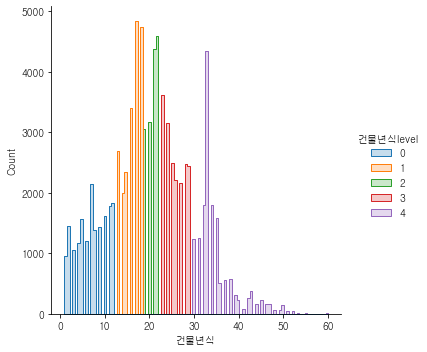

In [34]:
sns.displot(df, x='건물년식', hue='건물년식level', element='step')

In [35]:
df['물건금액level'] = pd.qcut(df['물건금액(단위:억)'], 5, labels=[0, 1, 2,3,4])
df[['물건금액(단위:억)', '물건금액level']].head()

,물건금액(단위:억),물건금액level
2,1.0,0
3,8.3,3
4,7.4,2
5,14.3,4
7,8.8,3


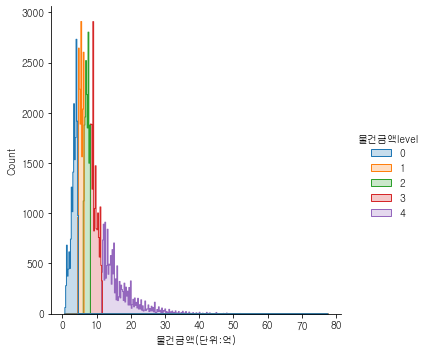

In [36]:
sns.displot(df, x='물건금액(단위:억)', hue='물건금액level', element='step')

In [255]:
df.head()

,자치구명,법정동명,건물면적,층정보,건축년도,물건금액,건물명,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명,Total,Segment,평수level,층정보level,건물년식level,물건금액level
2,구로구,구로동,36.90,1.0,1994.0,105000000,궁전아트빌라,11.0,1.0,0.955,27.0,구로구 구로동,2,Three,0,0,3,0
3,용산구,산천동,59.55,2.0,2001.0,830000000,리버힐삼성,18.0,8.3,4.611,20.0,용산구 산천동,2,Three,0,0,2,3
4,용산구,이촌동,64.43,5.0,1971.0,735000000,강변,19.0,7.4,3.868,50.0,용산구 이촌동,2,Three,0,1,4,2
5,용산구,이태원동,105.75,9.0,1982.0,1430000000,청화1,32.0,14.3,4.469,39.0,용산구 이태원동,2,Three,2,2,4,4
7,용산구,후암동,150.08,4.0,2002.0,875000000,힐튼빌리지2차,45.0,8.8,1.944,19.0,용산구 후암동,0,One,3,0,2,3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87372 entries, 2 to 175994
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   자치구명         87372 non-null  object  
 1   법정동명         87372 non-null  object  
 2   건물면적         87372 non-null  float64 
 3   층정보          87372 non-null  float64 
 4   건축년도         87372 non-null  float64 
 5   물건금액         87372 non-null  int64   
 6   건물명          87372 non-null  object  
 7   평수           87372 non-null  float64 
 8   물건금액(단위:억)   87372 non-null  float64 
 9   평당가격(단위:천만)  87372 non-null  float64 
 10  건물년식         87372 non-null  float64 
 11  동네명          87372 non-null  object  
 12  Total        87372 non-null  uint16  
 13  Segment      87372 non-null  category
 14  평수level      87372 non-null  category
 15  층정보level     87372 non-null  category
 16  건물년식level    87372 non-null  category
 17  물건금액level    87372 non-null  category
dtypes: category(5), float64(7

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='층정보', ylabel='Density'>

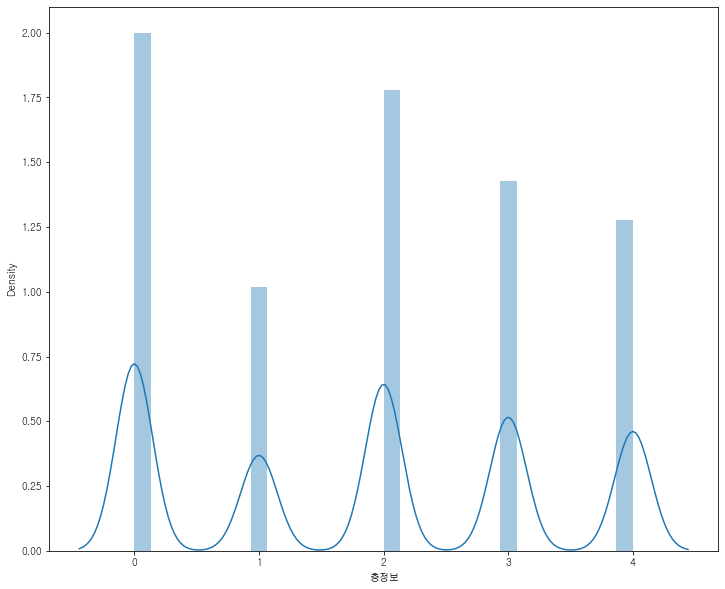

In [93]:
#그래프 사이즈 설정
plt.figure(figsize=(12, 10))
sns.distplot(q5cut(df['층정보']))

In [44]:
pd.set_option('max_rows',None)
df.groupby('Segment').agg(['median' ,'mean']).T

Segment                      One           Two         Three
건물면적        median  1.196700e+02  8.399000e+01  5.991000e+01
            mean    1.297434e+02  7.076740e+01  6.434363e+01
층정보         median  9.000000e+00  9.000000e+00  7.000000e+00
            mean    1.072715e+01  9.740322e+00  7.791524e+00
건축년도        median  2.002000e+03  2.007000e+03  1.994000e+03
            mean    2.000502e+03  2.008281e+03  1.992741e+03
물건금액        median  1.225000e+09  7.450000e+08  5.600000e+08
            mean    1.438678e+09  8.138285e+08  6.569392e+08
평수          median  3.600000e+01  2.500000e+01  1.800000e+01
            mean    3.933155e+01  2.152553e+01  1.951290e+01
물건금액(단위:억)  median  1.220000e+01  7.400000e+00  5.600000e+00
            mean    1.438767e+01  8.140052e+00  6.571226e+00
평당가격(단위:천만) median  3.151000e+00  3.423000e+00  2.944000e+00
            mean    3.644661e+00  3.817166e+00  3.372560e+00
건물년식        median  1.900000e+01  1.400000e+01  2.700000e+01
            mean    2.049793e+01  1.271915e+01  2.825875e+01
Total       median  0.000000e+00  1.000000e+00  2.000000e+00
            mean    0.000000e+00  1.000000e+00  2.000000e+00

In [108]:
df.columns

Index(['자치구명', '법정동명', '건물면적', '층정보', '건축년도', '물건금액', '건물명', '평수',
       '물건금액(단위:억)', '평당가격(단위:천만)', '건물년식', '동네명', 'Total', 'Segment',
       '평수level', '층정보level', '건물년식level', '물건금액level'],
      dtype='object')

# 레이더 차트를 그리기

In [256]:
df_new=df[['Segment','평수level', '층정보level', '건물년식level', '물건금액level']]
df_new=df_new.astype({'평수level':'int'
              ,'층정보level':'int'
              ,'건물년식level':'int'
              ,'물건금액level':'int'})
df_new.head()

,Segment,평수level,층정보level,건물년식level,물건금액level
2,Three,0,0,3,0
3,Three,0,0,2,3
4,Three,0,1,4,2
5,Three,2,2,4,4
7,One,3,0,2,3


In [257]:
df_new=df[['Segment','평수level', '층정보level', '건물년식level', '물건금액level']]
df_new=df_new.astype({'평수level':'int'
              ,'층정보level':'int'
              ,'건물년식level':'int'
              ,'물건금액level':'int'})
df_new=df_new.groupby('Segment').mean()
df_new=df_new.reset_index()

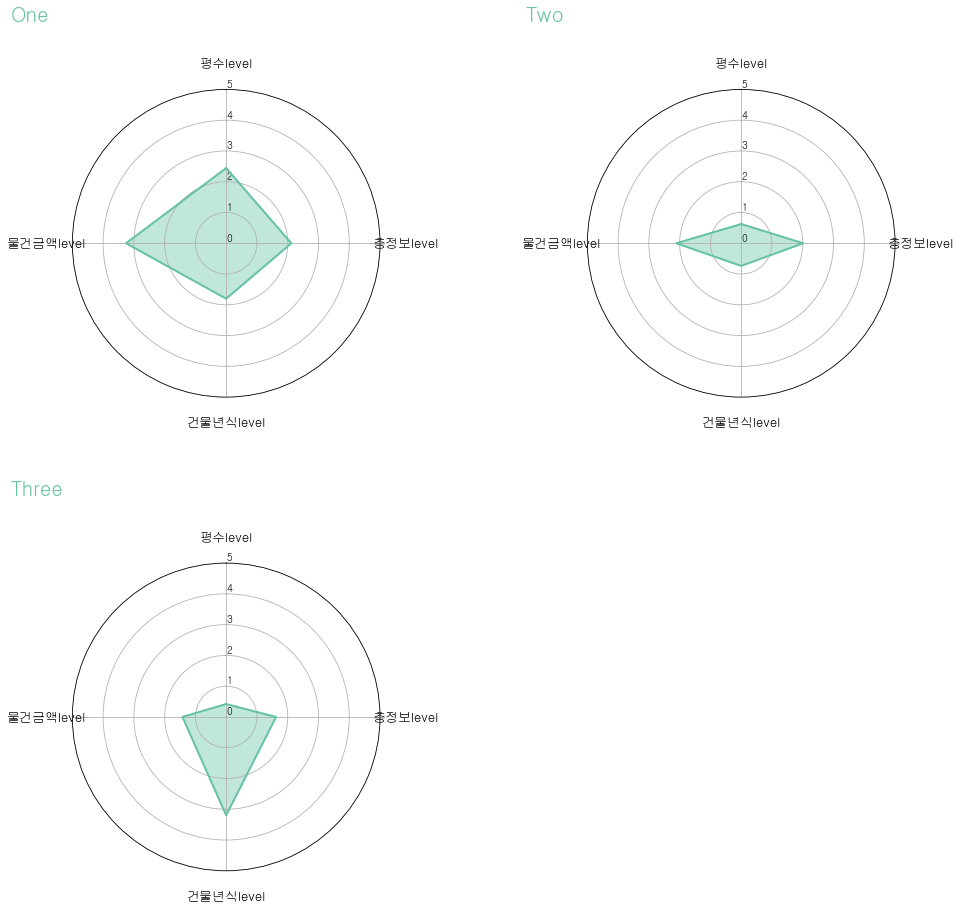

In [258]:
## 따로 그리기
labels = df_new.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가

my_palette = plt.cm.get_cmap("Set2", len(df.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in df_new.iterrows():
    color = my_palette(i)
    data = df_new.iloc[i].drop('Segment').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,5)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.Segment, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 Segment로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [259]:
df.groupby('Segment').mean()

,건물면적,층정보,건축년도,물건금액,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,Total
Segment,,,,,,,,,
One,129.743376,10.727155,2000.502068,1.438678e+09,39.331550,14.387667,3.644661,20.497932,0.0
Two,70.767397,9.740322,2008.280852,8.138285e+08,21.525532,8.140052,3.817166,12.719148,1.0
Three,64.343631,7.791524,1992.741251,6.569392e+08,19.512900,6.571226,3.372560,28.258749,2.0


In [260]:
df.columns

Index(['자치구명', '법정동명', '건물면적', '층정보', '건축년도', '물건금액', '건물명', '평수',
       '물건금액(단위:억)', '평당가격(단위:천만)', '건물년식', '동네명', 'Total', 'Segment',
       '평수level', '층정보level', '건물년식level', '물건금액level'],
      dtype='object')

# 1번 군집 데이터 프레임 생성

In [261]:
df_One = df[df.Segment=='One'].drop(['자치구명','법정동명', '건물면적', '물건금액', 'Segment', 'Total'],axis=1)
df_One = df_One.astype({'평수level':'int'
              ,'층정보level':'int'
              ,'건물년식level':'int'
              ,'물건금액level':'int'})
df_One.head()

,층정보,건축년도,건물명,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명,평수level,층정보level,건물년식level,물건금액level
7,4.0,2002.0,힐튼빌리지2차,45.0,8.8,1.944,19.0,용산구 후암동,3,0,2,3
10,16.0,1998.0,옥수하이츠,35.0,20.3,5.800,23.0,성동구 옥수동,2,4,3,4
11,3.0,2002.0,화인,42.0,8.0,1.905,19.0,용산구 후암동,3,0,2,2
29,5.0,1996.0,효창그린빌라트,49.0,8.8,1.796,25.0,마포구 공덕동,3,1,3,3
30,7.0,1977.0,반도,41.0,20.4,4.976,44.0,용산구 이촌동,3,2,4,4


# 1번 군집에서 평당가격 3천만원 이하, 건물년식 5년내 검색

In [272]:
df_One[(df_One['평당가격(단위:천만)']<3)&(df_One['건물년식']<5)].sort_values(by=["물건금액(단위:억)","건물년식","평수"], 
                   ascending=[False,True,True]).groupby(['동네명'],sort=True).head(2).reset_index(drop=True)

,층정보,건축년도,건물명,평수,물건금액(단위:억),평당가격(단위:천만),건물년식,동네명,평수level,층정보level,건물년식level,물건금액level
0,2.0,2019.0,항동중흥에스클래스베르데카운티,45.0,10.7,2.378,2.0,구로구 항동,3,0,0,3
1,16.0,2019.0,항동중흥에스클래스베르데카운티,45.0,9.8,2.167,2.0,구로구 항동,3,4,0,3
2,14.0,2018.0,현대(6차),37.0,9.2,2.500,3.0,노원구 중계동,2,3,0,3


# 마무리하며
### 호기롭게 실거래가를 예측하려다가 교수님의 1차 코멘트를 보고나서 아 쉬운 게 아니구나 싶었습니다. 그래서 군집분석을 실행하였습니다. 이 데이터 분석도 제가 거의 처음으로 완성 시킨 데이터라 어려운 부분이 많았습니다.
### 평수가 넓으면서 금액이 높은 유형, 고층이면서 금액이 조금 있는 유형, 저렴하고 평수가 좁으면서 건물년식이 많은 유형이 있다는 것을 알 수 있습니다.
### 역시 서울 중앙에 가까우면서 평수가 넓고 건물년식이 짧으며, 물건금액이 저렴한 아파트는 없었습니다. 
### 그래도 이 데이터 모델이 집을 알아보는데 사용 될 수 있을거라고 생각합니다.

# 참조
### 서울특별시 부동산 실거래가 정보 http://data.seoul.go.kr/dataList/OA-15548/S/1/datasetView.do